## LSSTC Data Science Fellowship Program
### Session 4, University of Washington, Sep 18-22, 2017

https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/tree/master/Session4/Day1/LSSTC-DSFP4-Ivezic-Likelihood.ipynb

### Day 1: Introduction to Likelihood and Maximum Likelihood Estimation (MLE) Method
Željko Ivezić, University of Washington


**It is impossible to do justice to this topic in only 1.5 hours.**

**Plan:** use a half of the time to cover the basics that are absolutely
needed for lectures this week, 

and use the remaining time for a rapid tour of a few additional very 
interesting topics, 

with references to external material for those who want to learn more. 



### Topics for today: 

a) introduction: what likelihood is and what it is good for

b) simple examples of MLE: one-dimensional gaussian

c) MLE in action: fitting a parametrized model with heteroscedastic gaussian errors on y axis

d) cost functions and penalized likelihood 

**--- break ---**

e) can we fit more parameters than we have data points? 

f) binomial likelihood: coin flip (example: galaxies with BHs) 

g) another non-gaussian example: uniform (box) likelihood  

h) and yet another non-gaussian example: Cauchy (exponential) likelihood 

i) maximization of multi-dimensional likelihood 

j) conceptual difficulties with the MLE (example: "waiting for a bus" problem)

k) what if we cannot write down the likelihood function? 



### a) introduction: what likelihood is and what it is good for

#### Example: 
If I draw values from a Gaussian $N(\mu, \sigma)$, e.g. measuring quantity $\mu$
with uncertainty $\sigma$ (somewhat erroneously a.k.a. “error bar”), 

then the probability that the measured value will be between $x$ and $x+dx$ is 

$$ p(x) = N(\mu,\sigma) * dx $$
where
      $$ N(\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$


For a sample of $N$ data points, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma$, the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

**An important assumption** that we made here is that random noise for different 
data points is independent (if it's not, we need to use methods such as Gaussian
process modeling). This assumption allowed us to simply multiply the likelihoods
for individual data points to obtain the likelihood of the whole dataset. 


Let's now see some numerical illustrations...
 

In [15]:
from __future__ import print_function, division, absolute_import
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
np.random.seed(42)
%matplotlib inline  

In [16]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L
# first generate a sample of N points drawn from N(mu,sigma):
sampleSize=3
mu = 1.0
sigma = 0.2 
sample = norm(mu, sigma).rvs(sampleSize) 
print(sample)

[ 1.09934283  0.97234714  1.12953771]


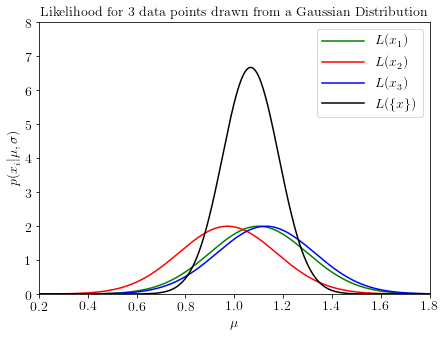

In [17]:
### Let's draw a homoscedastic sample of {x_i} from a Gaussian and see 
### what happens with L 
# now compute likelihoods for each point using true mu 
muGrid = np.linspace(0,2,1000)
L1 = norm(sample[0], sigma).pdf(muGrid) 
L2 = norm(sample[1], sigma).pdf(muGrid) 
L3 = norm(sample[2], sigma).pdf(muGrid) 
L = L1 * L2 * L3
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(muGrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('Likelihood for 3 data points drawn from a Gaussian Distribution')
plt.legend()
plt.show() 

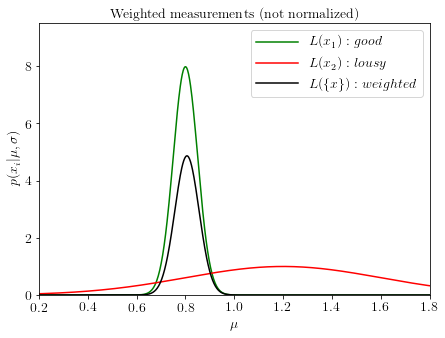

In [18]:
### What happens when we have one precise and one lousy measurement? 
L1 = norm(0.8, 0.05).pdf(muGrid)    
L2 = norm(1.2, 0.40).pdf(muGrid)     ## this is the lousy one: sigma = 0.4 >> 0.05
L = L1 * L2 
# plot
fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(muGrid, L1, ls='-', c='green', label=r'$L(x_1): good$')
plt.plot(muGrid, L2, ls='-', c='red', label=r'$L(x_2): lousy$')
plt.plot(muGrid, L, ls='-', c='black', label=r'$L(\{x\}): weighted$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 9.5)
plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('Weighted measurements (not normalized)')
plt.legend()
plt.show() 
 

**If either of the two likelihoods (or one of the likelihood and prior pair) is 
the Dirac's $\delta$ function ("zero width"), the posterior is the same delta function.**
 

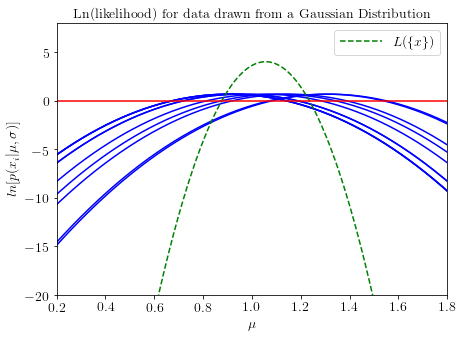

In [19]:
### Same as above, but with 10 points 
sampleSize=10
sampleBig = norm(mu, sigma).rvs(sampleSize) 
lnL = 0*muGrid
# compute and plot
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(0,sampleSize):
    lnLone = np.log(norm(sampleBig[i], sigma).pdf(muGrid)) 
    plt.plot(muGrid, lnLone, ls='-', c='blue')
    lnL += lnLone 
plt.plot(muGrid, lnL, ls='--', c='green', label=r'$L(\{x\})$')

plt.axhline(y=0.0, color='red', linestyle='-')
plt.xlim(0.2, 1.8)
plt.ylim(-20.0, 8.0)
plt.xlabel('$\mu$')
plt.ylabel(r'$ln[p(x_i|\mu,\sigma)]$')
plt.title('Ln(likelihood) for data drawn from a Gaussian Distribution')
plt.legend()
plt.show() 

#### Note: 
- likelihood values can be very small - the use of ln() (natural logarithm; giving log-likelihood) helps with displaying large dynamic range
- the use of ln()  is even more important when likelihoods for individual data points are multiplied: the product of likelihoods becomes a sum of ln(likelihood)
- the sample likelihood is not a true probability distribution - its integral is not 1! 
- the more data we add, the more "peaked" is the likelihood $L(\{x\})$ around
  the true value of $\mu$ (=1.0); this is the famous $1/\sqrt{N}$ behavior and we'll return to this point



#### Example: 
If I draw values from a Gaussian $N(\mu, \sigma)$, e.g. measuring quantity mu
with uncertainty $\sigma$ (somewhat erroneously a.k.a. “error bar”), 

then the probability that the measured value will be between $x$ and $x+dx$ is 

$$ p(x) = N(\mu,\sigma) * dx $$
where
      $$ N(\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$



#### What's so special about Gaussian (normal) distribution? 
- a Gaussian comes from the Central Limit Theorem (the mean of samples drawn from an almost 
    arbitrary distribution will follow a Gaussian distribution) 
- Gaussians have nice properties (convolution, Fourier transform, independence of mean and variance)
- Poisson distribution morphs into a Gaussian distribution for large $\mu$

** but likelihood function doesn’t have to be a gaussian!!! ** (it could be, e.g., exponential, 
uniform, poisson, or double gaussian distribution)

  

### a) introduction: what likelihood is and what it is good for

In everyday life, "likelihood" is often used as a synonym for "probability.” 

In statistics, **probability is used before data are available** to describe possible future 
outcomes given fixed model parameters (“a function of x with theta fixed”, like above), 
while **likelihood is used after data are available** to describe a function of model parameters 
for a given outcome (“a function of theta with x fixed”). ** But it's the same function (as above)!**

The two main reasons we are talking about the likelihood function

- Maximum Likelihood Estimation (MLE) is one of the most important methods in statistics
- The likelihood function is a crucial ingredient in the Bayesian framework

### a) introduction: what likelihood is and what it is good for

####  The likelihood function is a crucial ingredient in the Bayesian framework

Note: in case of flat priors, MLE produces numerically identical result as
the Bayesian Maximum A Posteriori (MAP) estimate.

![BayesSlide1](figures/bayes2.tiff)

### a) introduction: what likelihood is and what it is good for?

#### Maximum Likelihood Estimation (MLE) is one of the most important methods in statistics 

**MLE:** Assume that the likelihood function is given by
$$L(\mu,\sigma) \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

An astronomical example of the above would be velocity measurements for the Milky
Way halo stars ($\mu \sim 0$ km/s, $\sigma \sim 100$ km/s), with measurement
uncertainties negligible compared to $\sigma$ (say, $\sim1$ km/s).

We can make use of   
$$\prod_{i=1}^n A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_n) \exp[-(B_i+B_{i+1}+\ldots+B_n)]$$
and obtain
$$lnL(\mu,\sigma) \equiv ln[p(\{x_i\}|\mu,\sigma)] = const. - \frac{1}{2}\sum_{i=1}^N \frac{(x_i-\mu)^2}{\sigma^2}.$$

** An important side note** 
In case of gaussian likelihood, maximizing $lnL$ is equivalent to 
minimizing "chi-square"
$$\chi2 = \sum_{i=1}^N \frac{(x_i-\mu)^2}{\sigma^2}.$$ 
In other words,
$$ L \propto exp(-\frac{\chi^2}{2}).$$

** MLE estimates** 

The best estimates of $\mu$ and $\sigma$ are those that maximize $L(\mu,\sigma)$, or $lnL(\mu,\sigma)$,
for a given dataset $\{x_i\}$ ($i=1..N$).

E.g. the MLE for $\mu$, usually called $\hat \mu$ (and sometimes 
$\mu_0$), is obtained from 
$$\frac{d\;{lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0,$$


** Uncertainties of MLE estimates** 

The uncertainty of this estimate is fully captured by the likelihood function, 
but we'd like to quantify it with a few numbers. We *define* the uncertainty 
on our MLEs using second (partial) derivatives of log-likelihood:

$$\sigma_{jk} = \left([F^{-1}]_{jk}\right)^{1/2},$$
where $\theta$ is a vector of model parameters.

$[F^{-1}]_{jk}$ is an element of the inverse of the covariance matrix $F$, defined as  
$$F_{jk} = -\frac{d^2}{d\theta_j} \frac{\ln L}{d\theta_k} \Biggr\rvert_{\theta=\hat \theta}.$$

The marginal uncertainty for each model parameter, $\theta_i$, are given by the diagonal 
elements, $\sigma_{ii}$. These are the "error bars" that are typically quoted with each measurement.

In the one-dimensional case discussed above, we have
$$\sigma_{\mu} = \left( - \frac{d^2 ln L}{d\mu^2}  \Biggr\rvert_{\mu=\hat \mu}\right)^{-1/2},$$




### b) simple examples of MLE: one-dimensional gaussian

#### Maximum Likelihood Estimation (MLE) applied to a Heteroscedastic Gaussian

For example, assume $N$ measurements, $\{x_i\}$, where the uncertainty for each measurement is Gaussian with
a known $\sigma_i$. The likelihood of one measurement is 

$$p(x_i|\mu,\sigma_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$


and therefore the likelihood of all N measurements is

$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

An astronomical example of the above would be measurements of the mass
of an object, $\mu$ (that is, there is no intrinsic $\sigma$, only measurement
errors $\sigma_i$).

The more convenient log-likelihood is 
$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_0} = \sum_{i=1}^N \frac{(x_i - \mu_o)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu_o}{\sigma_i^2},$$

yields a MLE solution of 
$$\mu_0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty (from the second derivative)
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

 
In case of homoscedastic uncertainties, we get the familiar expression
$$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$


** Know your likelihood! **

The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor 
series and retaining terms up to second order (essentially, the surface of $\ln L$ 
is approximated by a parabola, or an ellipsoidal surface in multidimensional cases, 
around its maximum). If this expansion is exact (as is the case for a Gaussian error 
distribution), then we've completely captured the error information (see illustration
below). 

In general, this is not the case and the likelihood surface can significantly deviate 
from a smooth elliptical surface. Furthermore, it often happens in practice that the 
likelihood surface is multimodal. It is always a good idea to visualize the likelihood 
surface when in doubt.
 

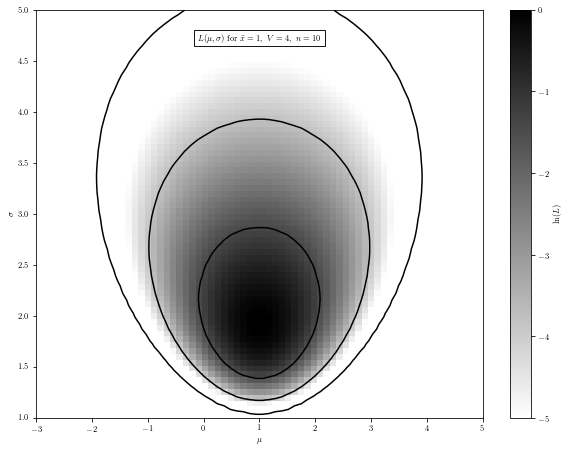

In [20]:
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()



In [21]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
from astroML.plotting import hist
np.random.seed(42)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

### Confidence Interval vs. Credible Region

In case of homoscedastic gaussian uncertainties, our estimator of $\mu$ is 
$\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you are most likely familiar with.

In the **frequentist paradigm**, the meaning of the *confidence interval* $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in 68% cases
of a large number of imaginary repeated experiments (each with a different N values of $\{x_i\}$). 
If we repeated the same measurement a hundred times, we'd find for 68 experiments the true value 
was within their computed confidence intervals ($1 \sigma$ errors).
 

Numerically, the same interval follows from the **Bayesian approach** with uniform priors.
However, the meaning of that so-called *credible region* is *fundamentally different*: it is the interval
that contains the true $\mu$ with a probability of 68%, given the given dataset (our dear one and only 
dataset - there are no imaginary experiments in Bayesian paradigm). This credible region is the 
relevant quantity in the context of scientific measurements. 

For more details, read
- [E.T. Jaynes: ``Confidence Intervals vs. Bayesian intervals''](http://bayes.wustl.edu/etj/articles/confidence.pdf)

- [Jake's excellent blog](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)
  

### The Essence of the Bayesian Method 

The basic premise of the Bayesian method is that probability statements are not limited to data, 
but can be made for model parameters and models themselves. Inferences are made by producing 
probability density functions (pdfs); most notably, **model parameters are treated as random variables**.



### Properties of ML Estimators

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

* **They are consistent estimators**; that is, they can be proven to converge to the true parameter value as the number of data points increases.
* **They are asymptotically normal estimators**. The distribution of the parameter estimate, as the number of data points increases to infinity, approaches a normal distribution, centered at the MLE, with a certain spread. This spread can often be easily calculated and used as a confidence band around the estimate.
* **They asymptotically achieve the theoretical minimum possible variance for an unbiased estimator, called the Cramér–Rao bound**. In other words, they achieve the best possible error given the data at hand; that is, no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate.

### Summary of the Maximum Likelihood Approach

Maximum likelihood estimation consists of the following conceptual steps:

1. **Hypothesis**: Formulate a model, a *hypothesis*, about how the data are generated. For example, this could be a statement that the data are a measurement of some quantity that come with Gaussian random errors (i.e., each measurement is equal to the true value, plus a deviation randomly drawn from the normal distribution). Models are typically described using a set of model parameters $\boldsymbol{\theta}$, and written as $\boldsymbol{M}(\boldsymbol{\theta})$.
2. **Maximum Likelihood Estimation**: Search for the "best" model parameters $\boldsymbol{\theta}$ which maximize the ***likelihood*** $L(\boldsymbol{\theta}) \equiv p(D|M)$. This search yields the MLE *point estimates*, $\boldsymbol{\theta_0}$ (or $\hat\theta$).
3. **Quantifying Estimate Uncertainty**: Determine the confidence region for model parameters, $\boldsymbol{\theta_0}$. Such a confidence estimate can be obtained analytically (possibly with some approximations), but can also be done numerically for arbitrary models using general frequentist techniques, such as bootstrap, jackknife, and cross-validation.
4. **Hypothesis Testing**: Perform hypothesis tests as needed to make other conclusions about models and point estimates. Possibly GOTO #1.

While these steps represent a blueprint for the frequentist approach in general, the likelihood is just one of many possible so-called objective functions (also called fitness functions, or cost functions). 


### c) MLE in action: fitting a parametrized model with heteroscedastic gaussian errors on y axis


Let us assume that we have $N$ pairs of measurements, $\{x_i, y_i\}$, where uncertainties for 
$\{x_i\}$ are negligible and uncertainty for each measurement $y_i$ is Gaussian and described
by a known $\sigma_i$. We also postulate that $\{y_i\}$ can be modeled as 
$$ y_i = f(x_i,\theta) + N(0,\sigma_i),$$
where $f(x,\theta)$ is some function of $x$ and a vector of model parameters $\theta$. 

For example, for the straight line fit, we have $f(x_i,\theta) = \theta_0 + \theta_1 x_i$. 

Because the noise is gaussian, the data likelihood can be written as 
$$L \equiv p(\{x_i, y_i\}|\theta,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(y_i-f(x_i,\theta))^2}{2\sigma_i^2}\right).$$

The more convenient log-likelihood is 
$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N \frac{[y_i - f(x_i,\theta)]^2}{\sigma_i^2}.$$

and we can estimate model parameters from
$$\frac{d\;{\rm lnL}(\theta_k)}{d\theta_k}\Biggr\rvert_{\hat \theta_k} \equiv 0, $$  
and their uncertainties from the inverse of the covariance matrix, as was discussed above.
 
In case of straight line fit, we can even derive a closed-form solution for the line slope
and intercept - this is the famous **Least Squares Method**. Now you know why the *squares*
of the residuals are minimized: because the square comes from the argument in the exponential
term of the *gaussian* error distribution!  But it doesn't have to be gaussian - and this
LSQ is not a universal method! For a different error distribution, you get a different 
result (e.g. exponential distribution, double-gaussian distribution). 

### An excellent astronomical example: the PSF (point-spread-function) flux 

We adopt a model $f(x_i, A) = A*psf(x_i)$, where we assumed 
- vector x_i corresponds to two-dimensional position in an image
- vector y_i corresponds to measured counts at position x_i
- the psf profile, $psf(x)$, is known, including centering 
 
Assuming homoscedastic errors, $\sigma$ (case of faint sources, where the noise is dominated
by the background, and not by the source), it is easy to show (try it!) by maximizing 
likelihood as a function of the single model parameter $A$ that the ML estimate for A is 
$$  \hat A = \sum_i \frac{y_i * psf(x_i)}{psf(x_i)^2}, $$
where it PSF normalization is assumed ($\sum_i psf(x_i) = 1$).  And by using the second
derivative, you can show that the uncertainty of this estimate is 

$$ \sigma_A = \left( \frac{\sigma^2}{\sum_i psf(x_i)^2} \right)^{1/2}.$$


For more details, see Section 4.3 (page 10) in 
[LSST Document LSE‐40 (The LSST Photon Rates and SNR Calculations, v1.2)](http://faculty.washington.edu/ivezic/Teaching/Astr511/LSST_SNRdoc.pdf)

###  d) cost functions and penalized likelihood 

We obtained model parameters by maximizing log-likelihood
$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N \frac{[y_i - f(x_i,\theta)]^2}{\sigma_i^2}.$$

This likelihood is just one of many possible so-called objective functions, or cost functions. 
Here the cost function quantifies some “cost” associated with parameter estimation. 

The expectation value of the cost function is called “risk” and can be minimized to obtain 
best-fit parameters. An often used form of risk is the mean integrated square error (MISE)
defined as,
$$ MISE = \int_{-\infty}^{\infty} [y(x) − f(x)]^2 dx, $$
where $y(x)$ is data and $f(x)$ is model for $f(x)$ (note the assumption of homoscedastic 
errors). The MISE measures how “close” is our model estimate $f(x)$ to the measured $y(x)$. 

The MISE is based on a cost function given by the mean squared error, also known as L2 norm. 
A cost function that minimizes absolute deviation is called L1 norm. The MLE applied to a 
Gaussian likelihood leads to an L2 cost function (e.g. the least squares method). 
If data instead followed the Laplace (exponential) distribution, the MLE would yield an 
L1 cost function (which is much more robust to outliers from a gaussian distribution). 

Outliers can be easily treated by modifying the cost function for ordinary LSQ. 
An example is the Huber loss function. With $t = [y(x) − f(x)]$, 
  
<img src="figures/huber1.tiff" alt="Drawing" style="width: 250px;"/>
<img src="figures/huber2.tiff" alt="Drawing" style="width: 500px;"/>
 

## BREAK!!!

### e) can we fit more parameters than we have data points? 

E.g. can we fit parabola to 2 data points? Yes, we can, using regularization! 

We can limit the complexity of the underlying regression model by using
the so-called penalized likelihood. This method is often referred to as 
regularization, or shrinkage, and works by applying a penalty to
the likelihood function. Regularization can come in many forms, but usually 
imposes smoothness on the model, or limits the numbers of, or the values of, 
the model parameters.

** In Bayesian framework, regularization corresponds to setting priors. **

The most common regularization methods are the Ridge (or Tikhonov) Regression and 
LASSO (least absolute shrinkage and selection). The former adds a quadratic 
penalty to the likelihood function and the latter adds a penalty proportional
to the absolute value of the model parameters. In Bayesian framework, these 
modifications of the likelihood function correspond to priors for model parameters
following a gaussian (ridge) and exponential (LASSO) distributions. 

  
<img src="figures/regularization1.tiff" alt="Drawing" style="width: 700px;"/>
<img src="figures/regularization2.tiff" alt="Drawing" style="width: 800px;"/>



### f) non-gaussian likelihood: binomial distribution

** Likelihood does not have to be gaussian! **
 
Let us assume that we studied $N = 10$ galaxies and found a black hole in $k = 4$ of them. 
Our best estimate for the fraction of galaxies with black holes is $b_o = k/N = 0.4$. 
An interesting question is, “What is the probability that, say, $b < 0.1$?”. For example, 
your colleague’s theory placed *an upper limit of 10%* for the fraction of galaxies with 
black holes and you want to test this theory using classical framework “Can it be rejected 
at a confidence level $\alpha = 0.01$?”.

In other words, if the probability of $b < 0.1$, given data, is smaller than 0.01 (that is,
the probability of $b > 0.1$ is larger than 0.99) we reject the theory (in classical statistical 
hypothesis testing), and if the probability of $b < 0.1$ is larger than 0.01 we cannot reject
the theory (which, of course, does not prove that the theory is correct!). 

** Mathematically, this example is exactly the same as the famous coin flip problem **

Here the data set $\{x_i\}$ is discrete: all outcomes are either 0 (heads) or 1 (tails, which we will consider “success”). 

Given a model parametrized by the probability of success (i.e. tails) $b$, the likelihood that the data set 
contains k outcomes equal to 1 is given by 
  $$    p(k\,|\,b, N) = \frac{N!}{k! \, (N-k)!} \, b^k \, (1-b)^{N-k} $$
  
MLE seeks the value of $b$ which maximizes $p(k\,|\,b, N)$ for given $k$ and $N$.
It's easy to show that the MLE solution is $b_o=k/N$. 

For large N, the uncertainty of $b_o$ 
is approximately Gaussian and given by 
$$ \sigma_b = \left[\frac{b_o \, (1-b_o)}{N}\right]^{1/2}. $$

For more details, inclusing the Bayesian solution of this problem, see this 
[lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-4-Thu.ipynb)

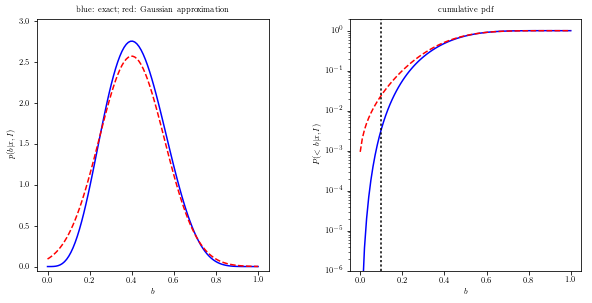

In [22]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm, binom
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Plot posterior as a function of b
n = 10  # number of points
k = 4  # number of successes from n draws

b = np.linspace(0, 1, 100)
db = b[1] - b[0]

# compute the probability p(b) (eqn. 5.70)
p_b = b ** k * (1 - b) ** (n - k)
p_b /= p_b.sum()
p_b /= db
cuml_p_b = p_b.cumsum()
cuml_p_b /= cuml_p_b[-1]

# compute the gaussian approximation (eqn. 5.71)
b0 = k * 1. / n
sigb = np.sqrt(b0*(1-b0)/n)
p_g = norm(b0, sigb).pdf(b)
cuml_p_g = p_g.cumsum()
cuml_p_g /= cuml_p_g[-1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(9, 5))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.35, bottom=0.18)

ax = fig.add_subplot(121)
ax.plot(b, p_b, '-b')
ax.plot(b, p_g, '--r')

ax.set_ylim(-0.05, np.max(p_b)*1.1)

ax.set_xlabel('$b$')
ax.set_ylabel('$p(b|x,I)$')
plt.title('blue: exact; red: Gaussian approximation')


ax = fig.add_subplot(122, yscale='log')
ax.plot(b, cuml_p_b, '-b')
ax.plot(b, cuml_p_g, '--r')
ax.plot([0.1, 0.1], [1E-6, 2], ':k')
plt.title('cumulative pdf')


ax.set_xlabel('$b$')
ax.set_ylabel('$P(<b|x,I)$')
ax.set_ylim(1E-6, 2)

plt.show()

### g) another non-gaussian example: uniform (box) likelihood  

** The mean does not have to be the most efficient estimator of the location! **

The uniform distribution (also known as "top-hat" and "box")  is described by
$$  p(x|\mu, W)  =  {1 \over W}  \,\,\, {\rm for} \,\, |x-\mu| \le {W \over 2} $$
and 0 otherwise. The likelihood of observing $x_i$ is given by
$$ p(x_i|\mu, W)  =  {1 \over W}  \,\,\, {\rm for} \,\, |x_i-\mu| \le {W \over 2},$$
and 0 otherwise (i.e. $x_i$ can be at most $W/2$ away from $\mu$). 

We assume that both $\mu$ and $W$ are unknown and need to be estimated from data. 
         
Here the ML estimator of $\mu$ is not the mean of $x_i$, but instead
$$ \hat \mu = \frac{min(x_i) + max(x_i)}{2}.$$
and its precision improves proportionally to $1/N$, that is faster than $1/\sqrt{N}$!
         
** What happened with the Central Limit Theorem? **
         
<img src="figures/uniform1.tiff" alt="Drawing" style="width: 700px;"/>


         

### h) and yet another (final) non-gaussian example: Cauchy (exponential) likelihood 

** The Central Limit Theorem talks about distributions that have the second moment **

Let's consider an example of a distribution without the second moment:  
the Cauchy, or Lorentzian, distribution, given by 
$$ p(x|\mu, \gamma) = {1\over \pi \gamma}  \left( {\gamma^2 \over \gamma^2 + (x-\mu)^2} \right).$$

It is a symmetric distribution described by the location parameter $\mu$ and the scale parameter $\gamma$,
and its median and mode are equal to $\mu$. Because its tails decrease as slowly as $x^{-2}$ for large $|x|$,
the mean, variance, standard deviation, and higher moments do not exist.

The mean of a sample drawn from the Cauchy distribution is not a good estimator of the 
distribution's location parameter. In particular,
the mean value for many independent samples will themselves follow the same Cauchy distribution,
and will not benefit from the central limit theorem (because the variance does not exist).
Instead, the location and scale parameters for a Cauchy distribution ($\mu$ and $\gamma$)
can be simply estimated using the median value and interquartile range for $\{ x_i \}$.  


**As a practical example, we will use the lighthouse problem** due to Gull. A lighthouse 
is positioned at $(x,y)=(\mu,\gamma)$ and it emits discrete light signals in random 
directions. The coastline is defined as the $y=0$ line, and the lighthouse's distance 
from it is $\gamma$. Let us define the angle $\theta$ as the angle between the line that 
connects the lighthouse and the point $(x,y)=(\mu,0)$, and the direction of a signal. 
The signals will be detected along the coastline with the positions
$$                      x = \mu + \gamma  \tan(\theta), $$
with $-\pi/2 \le \theta \le \pi/2$. If the angle $\theta$ is distributed uniformly,
it is easy to show that $x$ follows the Cauchy distribution, and the data likelihood is
$$ p(\{ x_i \}|\mu,\gamma,I)  = \prod_{i=1}^N  {1 \over \pi} \left( { \gamma \over \gamma^2 +(x_i-\mu)^2 }  \right). $$

Given a data set of measured positions $\{ x_i \}$, we need to estimate $\mu$ and $\gamma$.

** Note: it is assumed that the measurement uncertainty for $x_i$ is negligible **

<img src="figures/cauchy1.tiff" alt="Drawing" style="width: 800px;"/>




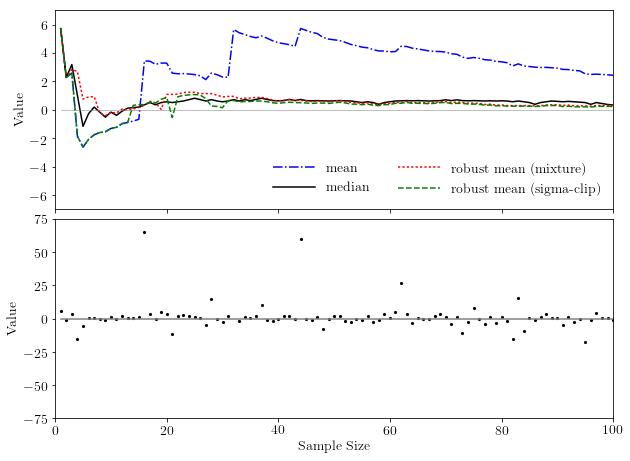

In [23]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)


def robust_mean_mixture(x):
    """Compute the mean via a mixture of two Gaussians

    One Gaussian accounts for outliers, and one Gaussian accounts  for
    the true distribution.  This cannot be computed analytically, so
    it uses scipy's function optimization
    """
    if len(x) == 1:
        return x

    x = x.ravel()

    mu_bg = np.mean(x)
    sig_bg = 3 * np.std(x)

    likelihood = lambda v: -np.sum(np.log(norm.pdf(x, v[0], v[1])
                                          + norm.pdf(x, mu_bg, sig_bg)))

    v0 = np.array([0, 30])

    v_best = optimize.fmin(likelihood, v0, disp=False)

    return v_best[0]


def robust_mean_iterated(x, sigma_cut=3):
    """Compute the robust mean iteratively

    After computing the mean, points further than 3 sigma from the mean
    are removed and the result is repeated until convergence.
    """
    flag = np.ones(x.shape, dtype=bool)
    n_to_keep = x.size

    while True:
        xf = x[flag]
        mu = xf.mean()
        sig = xf.std()
        if len(xf) == 1:
            break

        x_sig = abs((x - mu) / sig)

        too_far = (x_sig > sigma_cut)
        flag[too_far] = False
        n_flag = flag.sum()

        if n_flag == n_to_keep:
            break
        else:
            n_to_keep = n_flag

    return mu

#------------------------------------------------------------
# Create the distribution and compute means and medians
np.random.seed(6)
mu = 0
gamma = 2

xi = cauchy(mu, gamma).rvs(100)
Nrange = np.arange(1, len(xi) + 1)

mean = [np.mean(xi[:N]) for N in Nrange]
median = [np.median(xi[:N]) for N in Nrange]
mean_mixture = [robust_mean_mixture(xi[:N]) for N in Nrange]
mean_iter = [robust_mean_iterated(xi[:N]) for N in Nrange]

#------------------------------------------------------------
# Plot the results as a function of number of points
fig = plt.figure(figsize=(10, 7.5))
fig.subplots_adjust(hspace=0.05)

# first plot the mean
ax = fig.add_subplot(211)
ax.plot(Nrange, mean, '-.b', label='mean')
ax.plot(Nrange, median, '-k', label='median')
ax.plot(Nrange, mean_mixture, ':r', label='robust mean (mixture)')
ax.plot(Nrange, mean_iter, '--g', label='robust mean (sigma-clip)')
ax.plot(Nrange, 0 * Nrange, '-', c='gray', lw=0.5)

ax.set_xlim(0, 100)
ax.set_ylim(-7, 7)
ax.legend(loc=4, ncol=2, frameon=False)
ax.set_ylabel('Value')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# now plot the median
ax = fig.add_subplot(212)
ax.scatter(Nrange, xi, lw=0, s=10, c='k')
ax.plot(Nrange, 0 * Nrange, '-', c='gray')
ax.set_xlim(0, 100)
ax.set_ylim(-75, 75)
ax.set_xlabel('Sample Size')
ax.set_ylabel('Value')

plt.show()

The bottom panel shows a sample of $N$ points drawn from a Cauchy distribution with $\mu$ = 0 and $\gamma=2$. The top panel shows the sample median, sample mean, and two robust estimates of the location parameter as a function of the sample size (only points to the left from a given sample size are used). 

Note that the sample mean is not a good estimator of the distribution’s location parameter. Though the mean appears to converge as $N$ increases, this is deceiving: because of the large tails in the Cauchy distribution, there is always a high likelihood of a far-flung point affecting the sample mean. This behavior is markedly different from a Gaussian distribution where the probability of such “outliers” is much smaller. 

### i) maximization of multi-dimensional likelihood 

When the number of parameters in a model is large, direct exploration of the posterior pdf by exhaustive search becomes impractical, and often impossible. For example, if the grid for computing the likelihood, such as 
examples illustrated above, includes only 100 points per coordinate, the 5-dimensional model will require on order $10^{10}$ computations!

Fortunately, a number of numerical methods exist that utilize more efficient approaches than an exhaustive grid search. **Andy will introduce Markov Chain Monte Carlo methods tomorrow!**
 


### j) conceptual difficulties with the MLE 

#### An example of a difficulty with the MLE : "waiting for a bus" problem
 
Imagine you arrive at a bus stop, and observe that the bus arrives $t$ minutes later 
(it is assumed that you had no knowledge about the bus schedule). What is the mean time 
between two successive buses, $\tau$, if the buses keep a regular schedule? 

It is easy to derive an intuitive answer. The wait time is distributed uniformly in the interval $0 \le t \le \tau$, and on average you would wait for $t=\tau/2$ minutes.  Rearranging this gives $\tau = 2t$, which agrees with intuition.

What does the maximum likelihood approach give? 

The probability that you will wait $t$ 
minutes (the likelihood of data) is given by the uniform distribution (every $t$ is equally likely)
$$ p(t\,|\,\tau) =  1/\tau, $$
if $0 \le t \le \tau$ and $p(t|\tau)=0$ otherwise.


Because we only observe a single point, the data likelihood is simply equal to this probability. 
The maximum likelihood, then, corresponds to the smallest possible $\tau$ such that $t \le \tau$: 
this is satisfied by $\tau = t$ and not $\tau=2t$ as we expected!!

Computing the expectation value or the median for $\tau$ does not help either because
the resulting integrals diverge. These puzzling results are resolved by the use of appropriate prior
information, as will be discussed in a moment. We shall see several other examples later where the
addition of extra information changes the results we would get from the maximum likelihood
approach.

The Bayesian method is not, however, motivated by the differences in results
between maximum likelihood and Bayesian techniques.  These differences are
often negligible, especially when the data sets are large.  Rather, **the Bayesian
method is motivated by its ability to provide a full probabilistic framework
for data analysis**. One of the most important aspects of Bayesian analysis is the 
ability to straightforwardly incorporate unknown or uninteresting model 
parameters, the so-called nuisance parameters, in data analysis. 

### For completeness: Bayesian solution to "bus arrival problem"
 

In our **bus arrival problem**, $\tau$ is unknown model parameter and data (datum) is $t$. The
posterior pdf for $\tau$ is (we ignore normalization): 
$$p(\tau\,|\,t, I) \propto p(t\,|\,\tau,I) \, p(\tau\,|\,I).$$

The likelihood of data is given by the uniform distribution (every $t$ is equally likely, with 
$0 \le t \le \tau$):
$$ p(t\,|\,\tau,I) =  1/\tau. $$  

Following the Principle of Invariance, we assign the prior
$$ p(\tau\,|\,I) = 1/ \tau.$$

Note: the two pdfs look the same but this is essentially a coincidence. 

So, we have 
    $$p(\tau \,|\, t,I) \propto  \frac{1}{\tau^2},$$
for $\tau > t$ and 0 otherwise. We use normalization constraint 
$$ \int_t^\infty p(\tau\,|\,I)d\tau = \int_t^\infty \frac{C}{\tau^2} d\tau \equiv 1,$$
to get $C=t$ (the divergent integral over $\tau$ encountered in the maximum likelihood 
analysis is mitigated here by the extra $\tau$ term from the prior).

The properly normalized posterior pdf for $\tau$ (valid for $\tau > t$) is thus 
$$   p(\tau \,|\, t,I) = \frac{t}{\tau^2}.$$
  
  
The median $\tau$ given by the posterior $p(\tau \,|\, t,I)$ is now equal to $2t$, 
in agreement with our expectations. 

An interesting side result is that the p% quantiles 
are equal to ($1-t/\tau$); for example, the 95% confidence region for $\tau$, 
or **the credible region**, spans $1.03 t < \tau < 40 t$. If we waited for a bus 
for just 1 minute, then, adopting the usual 95% confidence region, we cannot reject the 
possibility that $\tau$ is as large as 40 minutes. 

Equivalently, if we waited for a 
bus for 1 minute, we can paraphrase Laplace and say that “it is a bet of 20 against 1 
that **the bus will arrive in the interval between 0.03 minutes and 39 minutes from now**.”





### k) what if we cannot write down the likelihood function? 

Sometimes you need to think harder. If no success, one can use methods
such as **Approximate Bayesian Computation** (ABC).  ABC is essentially a
rejection algorithm that only "accepts" model parameter values (drawn
from prior) for which some judiciously chosen "summary statistic" is 
"close enough" to its value computed from data. 

We don't have time to discuss ABC in depth this time, but you can look 
it up on Wikipedia! 

https://en.wikipedia.org/wiki/Approximate_Bayesian_computation



 

### What did we learn today? 

1. Likelihood function plays a central role in both frequentist and Bayesian
data analysis - it encapsulates our knowledge (beliefs) about the data generation process

2. In frequentist framework, likelihood is only one of possible cost functions; in Bayesian
   framework, it plays a major role. 

3. Maximum likelihood method provides theoretical foundations for many common results
(e.g. weighted mean) and enables fitting of complex functions to data.

4. For normal (gaussian) distribution, MLE method becomes $\chi^2$ minimization. 

5. **Likelihood doesn't have to be gaussian** - indeed, sometimes it's impossible to 
write it down!

6. ML method, while exceedingly useful, can sometimes produce counter-intuitive results - Bayes to the rescue! 


